In [11]:
import geopandas as gpd
import pandas as pd
import fiona
import matplotlib.pyplot as plt
from shapely.geometry import Point
from tqdm import tqdm
import rasterio
import numpy as np
import yaml
import os

# Load configuration
with open('../../config.yaml', 'r') as file:
    config = yaml.safe_load(file)

def resolve_path(relative_path):
    return os.path.join(config['base_path'], relative_path)

/tmp/ipykernel_584497/77558415.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(resolve_path(config['Groundwater_Productivity_path']), delim_whitespace=True)
Creating geometries: 1019265it [00:06, 160208.58it/s]
Saving file: 100%|██████████| 1019265/1019265 [01:25<00:00, 11912.16it/s]


         X          Y  Liters_Second                  geometry
0  9.41405  37.251192            3.0  POINT (9.41405 37.25119)
1  9.46405  37.251192            3.0  POINT (9.46405 37.25119)
2  9.51405  37.251192            3.0  POINT (9.51405 37.25119)
3  9.56405  37.251192            3.0  POINT (9.56405 37.25119)
4  9.61405  37.251192           22.5  POINT (9.61405 37.25119)


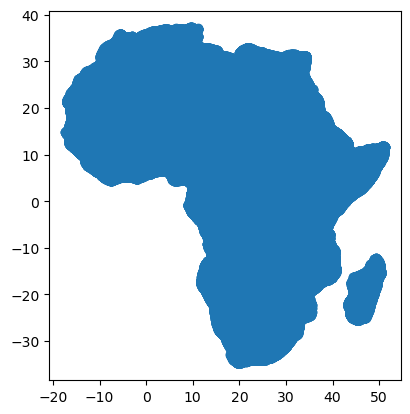

In [12]:
# Enable tqdm for Pandas apply function
tqdm.pandas()

# Load the data with a progress bar
df = pd.read_csv(resolve_path(config['Groundwater_Productivity_path']), delim_whitespace=True)

# Create geometry for coordinates with a progress bar
geometry = [Point(xy) for xy in tqdm(zip(df.X, df.Y), desc="Creating geometries")]
gdf = gpd.GeoDataFrame(df, geometry=geometry)
gdf.set_crs(epsg=4326, inplace=True)

# Rename column 'GWPROD_V2'
gdf.rename(columns={'GWPROD_V2': 'Liters_Second'}, inplace=True)

# Reassign values with a progress bar
value_map = {'VH': 20.0, 'H': 22.5, 'M': 3.0, 'LM': 0.75, 'L': 0.3, 'VL': 0.1}
gdf['Liters_Second'] = gdf['Liters_Second'].progress_apply(lambda x: value_map.get(x, x))

# Save file with a progress bar
with tqdm(total=len(gdf), desc="Saving file") as pbar:
    gdf.to_file(resolve_path(config['Groundwater_Prod_gpkg_path']), layer='groundwater', driver='GPKG')
    pbar.update(len(gdf))

print(gdf.head())
gdf.plot()
plt.show()

/tmp/ipykernel_584497/3253649936.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(resolve_path(config['Groundwater_Productivity_path']), delim_whitespace=True)
Creating geometries: 1019265it [00:06, 160245.32it/s]
100%|██████████| 1019265/1019265 [00:13<00:00, 74868.91it/s]


             X          Y  Liters_Second                   geometry  \
75472 -2.83595  29.301192          22.50  POINT (-2.83595 29.30119)   
75473 -2.78595  29.301192           0.75  POINT (-2.78595 29.30119)   
76352 -2.83595  29.251192          22.50  POINT (-2.83595 29.25119)   
76353 -2.78595  29.251192          22.50  POINT (-2.78595 29.25119)   
76354 -2.73595  29.251192          22.50  POINT (-2.73595 29.25119)   

       in_cropland  
75472         True  
75473         True  
76352         True  
76353         True  
76354         True  


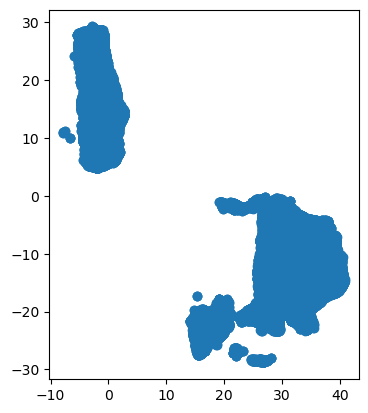

In [3]:
# Enable tqdm for Pandas apply function
tqdm.pandas()

# Load the data with a progress bar
df = pd.read_csv(resolve_path(config['Groundwater_Productivity_path']), delim_whitespace=True)

# Create geometry for coordinates with a progress bar
geometry = [Point(xy) for xy in tqdm(zip(df.X, df.Y), desc="Creating geometries")]
gdf = gpd.GeoDataFrame(df, geometry=geometry)
gdf.set_crs(epsg=4326, inplace=True)

# Rename column 'GWPROD_V2'
gdf.rename(columns={'GWPROD_V2': 'Liters_Second'}, inplace=True)

# Reassign values with a progress bar
value_map = {'VH': 20.0, 'H': 22.5, 'M': 3.0, 'LM': 0.75, 'L': 0.3, 'VL': 0.1}
gdf['Liters_Second'] = gdf['Liters_Second'].progress_apply(lambda x: value_map.get(x, x))

# Load the binary cropland TIFF file
with rasterio.open(resolve_path(config['Arid_Cropland_tif_path'])) as src:
    cropland_data = src.read(1)
    cropland_transform = src.transform

# Filter groundwater points to just the arid cropland areas
def is_in_cropland(point):
    x, y = point.x, point.y
    row, col = ~cropland_transform * (x, y)
    row, col = int(row), int(col)
    if 0 <= row < cropland_data.shape[0] and 0 <= col < cropland_data.shape[1]:
        return cropland_data[row, col] == 1
    return False

gdf['in_cropland'] = gdf['geometry'].progress_apply(is_in_cropland)
gdf_cropland = gdf[gdf['in_cropland']]

print(gdf_cropland.head())
gdf_cropland.plot()
plt.show()

/tmp/ipykernel_584497/3258685423.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(resolve_path(config['Groundwater_Productivity_path']), delim_whitespace=True)
Creating geometries: 1019265it [00:06, 158673.16it/s]
100%|██████████| 1019265/1019265 [00:14<00:00, 69640.39it/s]


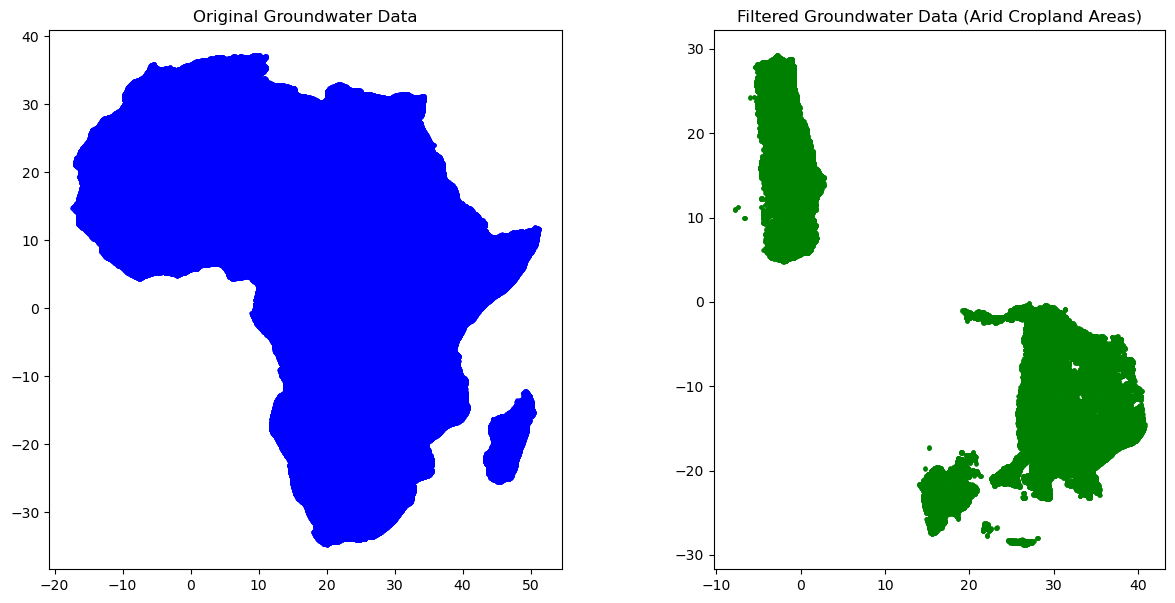

In [4]:
tqdm.pandas()

# Load the data with a progress bar
df = pd.read_csv(resolve_path(config['Groundwater_Productivity_path']), delim_whitespace=True)

# Create geometry for coordinates with a progress bar
geometry = [Point(xy) for xy in tqdm(zip(df.X, df.Y), desc="Creating geometries")]
gdf = gpd.GeoDataFrame(df, geometry=geometry)
gdf.set_crs(epsg=4326, inplace=True)

# Rename column 'GWPROD_V2'
gdf.rename(columns={'GWPROD_V2': 'Liters_Second'}, inplace=True)

# Reassign values with a progress bar
value_map = {'VH': 20.0, 'H': 22.5, 'M': 3.0, 'LM': 0.75, 'L': 0.3, 'VL': 0.1}
gdf['Liters_Second'] = gdf['Liters_Second'].progress_apply(lambda x: value_map.get(x, x))

# Load the binary cropland TIFF file
with rasterio.open(resolve_path(config['Arid_Cropland_tif_path'])) as src:
    cropland_data = src.read(1)
    cropland_transform = src.transform

# Filter groundwater points to just the arid cropland areas
def is_in_cropland(point):
    x, y = point.x, point.y
    row, col = ~cropland_transform * (x, y)
    row, col = int(row), int(col)
    if 0 <= row < cropland_data.shape[0] and 0 <= col < cropland_data.shape[1]:
        return cropland_data[row, col] == 1
    return False

gdf['in_cropland'] = gdf['geometry'].progress_apply(is_in_cropland)
gdf_cropland = gdf[gdf['in_cropland']]

# Plot original and filtered data side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Plot original groundwater data
gdf.plot(ax=axes[0], color='blue', markersize=5)
axes[0].set_title('Original Groundwater Data')

# Plot filtered groundwater data
gdf_cropland.plot(ax=axes[1], color='green', markersize=5)
axes[1].set_title('Filtered Groundwater Data (Arid Cropland Areas)')

plt.show()


In [21]:
# Load GW data
gdf_groundwater = gpd.read_file(resolve_path(config['Groundwater_Prod_gpkg_path']))

# Load CPIS data
gdf_CPIS = gpd.read_file(resolve_path(config['Combined_CPIS_shp_path']))

# Ensure both are in the same CRS
gdf_groundwater = gdf_groundwater.to_crs(epsg=4326)
gdf_CPIS = gdf_CPIS.to_crs(epsg=4326)

# Perform spatial join to overlay CPIS polygons with groundwater productivity points
CPIS_groundwater_join = gpd.sjoin(gdf_CPIS, gdf_groundwater, how='inner', predicate='intersects')

# Calculate the mean groundwater productivity for CPIS
mean_CPIS_groundwater = CPIS_groundwater_join['Liters_Second'].mean()
print(f"Mean Groundwater Productivity for CPIS: {mean_CPIS_groundwater} L/s")

      ID  year_2000  year_2021       Country Country Co  \
10    11          1          1  South Africa        ZAF   
30    31          1          1  South Africa        ZAF   
106  107          1          1  South Africa        ZAF   
178  179          1          1  South Africa        ZAF   
239  240          1          1  South Africa        ZAF   

                                              geometry  index_right         X  \
10   POLYGON ((20.06531 -34.09713, 20.06585 -34.097...      1018749  20.06405   
30   POLYGON ((20.26416 -34.04311, 20.26448 -34.043...      1018670  20.26405   
106  POLYGON ((18.61550 -32.64686, 18.61572 -32.646...      1013711  18.61405   
178  POLYGON ((18.56496 -32.54525, 18.56518 -32.545...      1013304  18.56405   
239  POLYGON ((18.71413 -32.39763, 18.71445 -32.397...      1012691  18.71405   

             Y  Liters_Second  
10  -34.098808           0.30  
30  -34.048808           0.30  
106 -32.648808           0.75  
178 -32.548808          22.50 

In [19]:
# Load arid cropland data
with rasterio.open(resolve_path(config['Arid_Cropland_tif_path'])) as src:
    masked_cropland_data = src.read(1)
    masked_cropland_transform = src.transform

# Extract groundwater productivity values for cropland areas
groundwater_points = []
for idx, row in gdf_groundwater.iterrows():
    # Get the coordinates of the groundwater point
    x, y = row.geometry.x, row.geometry.y
    
    # Convert coordinates to raster space
    col_idx, row_idx = ~masked_cropland_transform * (x, y)
    col_idx, row_idx = int(col_idx), int(row_idx)
    
    # Check if the point falls within the cropland area
    if masked_cropland_data[row_idx, col_idx] == 1:
        if not np.isnan(row['Liters_Second']):  # Check if Liters_Second is not NaN
                groundwater_points.append(row['Liters_Second'])

# Calculate the mean groundwater productivity for all cropland
mean_cropland_groundwater = np.mean(groundwater_points)
print(f"Mean Groundwater Productivity for Cropland: {mean_cropland_groundwater} L/s")

Mean Groundwater Productivity for Cropland: 7.414382166280426 L/s


In [20]:
# Calculate the targeting ratio
targeting_ratio = mean_CPIS_groundwater / mean_cropland_groundwater
print(f"Targeting Ratio: {targeting_ratio}")

Targeting Ratio: 0.5805612671499913
